# IoT23 Data Preprocessing with 6 million samples 

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time as timer

In [2]:
data= pd.read_csv('D:\JupyterNotebook\GitHub\IoT-BotNet-detection-on-IoT23-dataset\IoT23\Data files\iot23_combined_new.csv',low_memory=False,error_bad_lines=False)

In [3]:
data.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


Oh..! we have extra column.. lets get rid of it 

In [4]:
del data['Unnamed: 0']

In [5]:
data.shape

(6046623, 21)

Ok...! now we have our data with 21 features ! and around 6 million samples..! 
Its time to clean the data and bring it in good format! 

In [3]:
#data['service'] = data['service'].str.replace('-','0')
data['duration'] = data['duration'].str.replace('-','0')
data['orig_bytes'] = data['orig_bytes'].str.replace('-','0')
data['resp_bytes'] = data['resp_bytes'].str.replace('-','0')

In [7]:
df=data

In [8]:
df['orig_bytes']=df['orig_bytes'].astype(float)

In [9]:
df['duration']=df['duration'].astype(float)

In [10]:
df['resp_bytes']=df['resp_bytes'].astype(float)

In [11]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,0,3000000.0,0.0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,0,2000000.0,0.0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,0,2000000.0,0.0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,0,2000000.0,0.0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,0,2000000.0,0.0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


Let us first see if it has any null values!!!!!

ok.. so there is no null values... but there are many rows with '-' this sign.. we need to 
remove or replace this sign

But we need to make some decision on certain variables..! and drop those 
becuase they don't make sense or they can hurt the ML alogrithm as we did in our previous dataset

before that we do some Explatory data analysis 1! 

so this dataset is mixture of different types of data types..! 

ok... we have various unique values in each column as well...! 

In [56]:
data.describe()

,ts,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06
mean,1.546218e+09,3.603571e+04,1.897556e+04,8.448126e+05,6.521870e+02,6.064833e+01,5.090908e-02,4.375558e+01,1.907296e+03,5.875329e-02,6.426806e+01
std,9.546116e+06,1.776917e+04,2.273121e+04,1.702827e+06,8.381730e+05,1.369454e+05,2.108386e+01,3.534218e+04,1.392789e+06,9.774769e+01,1.422790e+05
min,1.532101e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.537541e+09,2.256800e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,1.545433e+09,3.618500e+04,8.081000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
75%,1.551383e+09,5.084000e+04,3.721500e+04,1.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,1.569018e+09,6.553500e+04,6.549000e+04,9.000000e+06,1.744830e+09,3.365164e+08,2.027200e+04,6.602735e+07,1.914793e+09,2.394840e+05,3.496187e+08


I don't understand this!!!!!!!

Ok so let us drop some variables now..! as per our previous practice! 
we dropped data.drop(['duration','src_ip','conn_state','src_port','ts','dst_ip','dst_port'], axis=1, inplace=True)

In [12]:
new_df=data.drop(['uid','id.orig_h','id.orig_p','id.resp_h','id.orig_p','id.resp_p','local_orig','local_resp'], axis=1)

Ref for dropping the features:https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9576115

for dropping uid .. ref Austin, Michael, "IoT Malicious Trafc Classifcation Using Machine Learning" (2021). Graduate Theses,
Dissertations, and Problem Reports. 8024.
https://researchrepository.wvu.edu/etd/8024

In [13]:
new_df.shape

(6046623, 14)

so we remain with 16 features now since we dropped 6 unnecessary features..! 

Let us see the label distribution....! 

In [14]:
new_df['label'].value_counts()

PartOfAHorizontalPortScan     3389036
Okiru                         1313012
Benign                         688812
DDoS                           638506
C&C                             15286
C&C-HeartBeat                    1332
Attack                            538
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [15]:
y=new_df

In [16]:
y.head()

,ts,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,tcp,0,3000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,tcp,0,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,tcp,0,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,tcp,0,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,tcp,0,2000000.0,0.0,0.0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


# Separte the input variable and output variables

In [17]:
X= new_df.iloc[:,:-1]

In [18]:
X.shape

(6046623, 13)

In [19]:
y=new_df['label']

# Separate Categorial variables from the numerical for encoding purpose

In [20]:
cat_df =X.select_dtypes(include=['object']).copy()
cat_df.head()

,proto,service,conn_state,history
0,tcp,0,S0,S
1,tcp,0,S0,S
2,tcp,0,S0,S
3,tcp,0,S0,S
4,tcp,0,S0,S


In [21]:
cat_df.shape

(6046623, 4)

so there are only 9 categorical variables in this dataset... interesting to see duration, orig_bytes and resp bytes as categorical features...

In [22]:
num_df =X.select_dtypes(exclude=['object']).copy()
num_df.head()

,ts,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,3000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
1,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
2,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
3,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0
4,1.536227e+09,2000000.0,0.0,0.0,0.0,2.0,80.0,0.0,0.0


let us label encode these categorical values into some integer values...

In [23]:
encode_all_cat =cat_df.apply(LabelEncoder().fit_transform)

In [24]:
encoded_data =pd.concat([num_df,encode_all_cat], axis=1)

In [25]:
le=LabelEncoder()

In [26]:
Y=le.fit_transform(y)

In [27]:
Y

array([12, 12, 12, ...,  1,  1,  1])

In [28]:
X=encoded_data

In [29]:
scaling=StandardScaler()

In [30]:
X=scaling.fit_transform(X)

In [31]:
X

array([[-1.04660914e+00,  1.26565250e+00, -7.78105479e-04, ...,
        -3.41042399e-02,  2.98388015e-01,  2.49781923e-01],
       [-1.04660914e+00,  6.78393822e-01, -7.78105479e-04, ...,
        -3.41042399e-02,  2.98388015e-01,  2.49781923e-01],
       [-1.04660914e+00,  6.78393822e-01, -7.78105479e-04, ...,
        -3.41042399e-02,  2.98388015e-01,  2.49781923e-01],
       ...,
       [ 1.67048883e+00, -4.96070790e-01, -6.92204356e-04, ...,
        -3.41042399e-02, -3.24980200e+00, -3.28095923e+00],
       [ 1.67048893e+00, -4.96096986e-01, -5.39491248e-04, ...,
        -3.41042399e-02, -3.24980200e+00, -3.28095923e+00],
       [ 1.67048897e+00, -4.96097558e-01, -7.78105479e-04, ...,
        -3.41042399e-02, -3.24980200e+00, -3.28095923e+00]])

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [106]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [107]:
DT_clf= DecisionTreeClassifier()

In [108]:
start = timer.time()
score = ['precision_macro', 'recall_macro','accuracy','f1_macro']
scores = cross_validate(DT_clf, X, Y, scoring=score, cv=cv, n_jobs=-1)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 28.54 seconds


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 203, in fit
    check_classification_targets(y)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\multiclass

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.20)

In [117]:
X_train.shape

(4837298, 13)

In [119]:
X_train.shape

(4837298, 13)

In [120]:
X_test.shape

(1209325, 13)

In [121]:
X_test.shape

(1209325, 13)

In [122]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=10, test_size=0.20)

# Decision Tree

In [36]:
DecisionTreeClassifier?

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [110]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 15)]

In [112]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [128]:
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.645, test: 0.645
>2, train: 0.668, test: 0.668
>3, train: 0.751, test: 0.751
>4, train: 0.812, test: 0.812
>5, train: 0.896, test: 0.896
>6, train: 0.896, test: 0.896
>7, train: 0.896, test: 0.896
>8, train: 0.898, test: 0.898
>9, train: 0.900, test: 0.900
>10, train: 0.900, test: 0.900
>11, train: 0.900, test: 0.900
>12, train: 0.900, test: 0.900
>13, train: 0.900, test: 0.900
>14, train: 0.900, test: 0.900


In [129]:
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_val)
	test_acc = accuracy_score(Y_val, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.645, test: 0.645
>2, train: 0.668, test: 0.668
>3, train: 0.751, test: 0.752
>4, train: 0.812, test: 0.812
>5, train: 0.896, test: 0.896
>6, train: 0.896, test: 0.896
>7, train: 0.896, test: 0.896
>8, train: 0.898, test: 0.898
>9, train: 0.900, test: 0.899
>10, train: 0.900, test: 0.900
>11, train: 0.900, test: 0.900
>12, train: 0.900, test: 0.900
>13, train: 0.900, test: 0.900
>14, train: 0.900, test: 0.900


ValueError: x and y must have same first dimension, but have shapes (14,) and (28,)

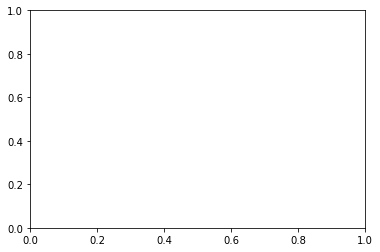

In [130]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Logistic Regression 

In [49]:
start = timer.time()
logit_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42,   max_iter=300)
logit_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))


Finished training within 1168.46 seconds


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

In [52]:
print("Classification report for LR: \n{}".format(classification_report(Y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(Y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(Y_test,y_logit)))

# calculate precision, recall, and f1 scores
prec_logit = precision_score(Y_test,y_logit,average='weighted')
rec_logit = recall_score(Y_test,y_logit,average='weighted')
f1_logit = f1_score(Y_test,y_logit,average='weighted')
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.70      0.20      0.31       115
           1       0.93      0.03      0.06    138241
           2       0.90      0.11      0.20      3031
           3       0.00      0.00      0.00         6
           4       0.88      0.06      0.11       250
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         7
           8       1.00      0.81      0.89    127471
           9       0.00      0.00      0.00         4
          10       0.08      0.00      0.00    262515
          11       0.00      0.00      0.00         1
          12       0.62      1.00      0.76    677681

    accuracy                           0.65   1209325
   macro avg       0.42      0.18      0.19   1209325
weighted avg       0.57      0.65      0.53   1209325

Confusion matrix for LR: 
[[    23     87      0      0      2      0      0      1      0      2
    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for LR: 0.57
Recall score for LR: 0.65
F1 score for LR: 0.53


In [53]:
cf=confusion_matrix(Y_test,y_logit)

In [54]:
 from sklearn.metrics import plot_confusion_matrix

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


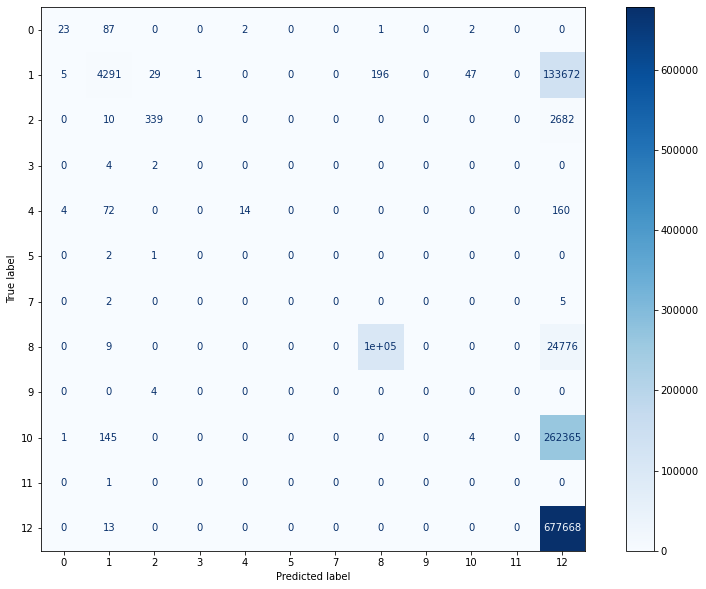

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(logit_model, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()

# Guassian Naive Bayes

In [123]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 1.68 seconds


In [124]:
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

In [125]:
print("Classification report for GNB: \n{}".format(classification_report(Y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(Y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(Y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(Y_test,y_gnb,average='weighted')
rec_gnb = recall_score(Y_test,y_gnb,average='weighted')
f1_gnb = f1_score(Y_test,y_gnb,average='weighted')
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.56      0.08      0.14       126
           1       1.00      0.03      0.06    137700
           2       0.60      0.13      0.21      3065
           3       0.48      1.00      0.65        12
           4       0.00      0.28      0.00       267
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.33      0.50         6
           8       0.32      0.00      0.00    127772
           9       1.00      0.50      0.67         4
          10       0.28      0.98      0.43    262876
          12       0.93      0.24      0.38    677495

    accuracy                           0.35   1209325
   macro avg       0.60      0.38      0.34   1209325
weighted avg       0.73      0.35      0.31   1209325

Confusion matrix for GNB: 
[[    10      1      0      0    115      0      0      0      0      0
  

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for GNB: 0.73
Recall score for GNB: 0.35
F1 score for GNB: 0.31


In [126]:
# Predicting the test set results
y_gnb = gnb_model.predict(X_val)
y_gnb_prob = gnb_model.predict_proba(X_val)

In [127]:
print("Classification report for GNB: \n{}".format(classification_report(Y_val,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(Y_val,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(Y_val,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(Y_val,y_gnb,average='weighted')
rec_gnb = recall_score(Y_val,y_gnb,average='weighted')
f1_gnb = f1_score(Y_val,y_gnb,average='weighted')
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.45      0.05      0.10        93
           1       1.00      0.03      0.06    110306
           2       0.58      0.11      0.18      2398
           3       0.32      1.00      0.48         6
           4       0.00      0.37      0.00       221
           7       0.00      0.00      0.00         1
           8       0.58      0.00      0.00    102554
           9       0.00      0.00      0.00         1
          10       0.28      0.98      0.43    210408
          11       0.00      0.00      0.00         1
          12       0.93      0.24      0.38    541471

    accuracy                           0.35    967460
   macro avg       0.38      0.25      0.15    967460
weighted avg       0.76      0.35      0.31    967460

Confusion matrix for GNB: 
[[     5      1      0      0     87      0      0      0      0      0
       0]
 [     1   3150    190     12    231      0   

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for GNB: 0.76
Recall score for GNB: 0.35
F1 score for GNB: 0.31


In [59]:
start = timer.time()
Rf_clf=RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
Rf_clf.fit(X_train, Y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

Finished training within 1027.32 seconds


In [60]:
y_RF = Rf_clf.predict(X_test)
y_RF_prob = Rf_clf.predict_proba(X_test)

In [62]:
print("Classification report for RF: \n{}".format(classification_report(Y_test,y_RF)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(Y_test,y_RF)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(Y_test,y_RF)))
# calculate precision, recall, and f1 scores
prec_rf = precision_score(Y_test,y_RF, average='weighted')
rec_rf = recall_score(Y_test,y_RF,average='weighted')
f1_rf = f1_score(Y_test,y_RF,average='weighted')

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       115
           1       0.70      0.27      0.39    138241
           2       0.93      0.11      0.20      3031
           3       0.45      0.83      0.59         6
           4       0.79      0.28      0.41       250
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         7
           8       1.00      0.81      0.89    127471
           9       1.00      0.25      0.40         4
          10       0.43      0.00      0.00    262515
          11       0.00      0.00      0.00         1
          12       0.63      0.98      0.77    677681

    accuracy                           0.66   1209325
   macro avg       0.53      0.33      0.34   1209325
weighted avg       0.63      0.66      0.57   1209325

Confusion matrix for RF: 
[[    47     28      0      0      6      0      0      2      0     30
    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


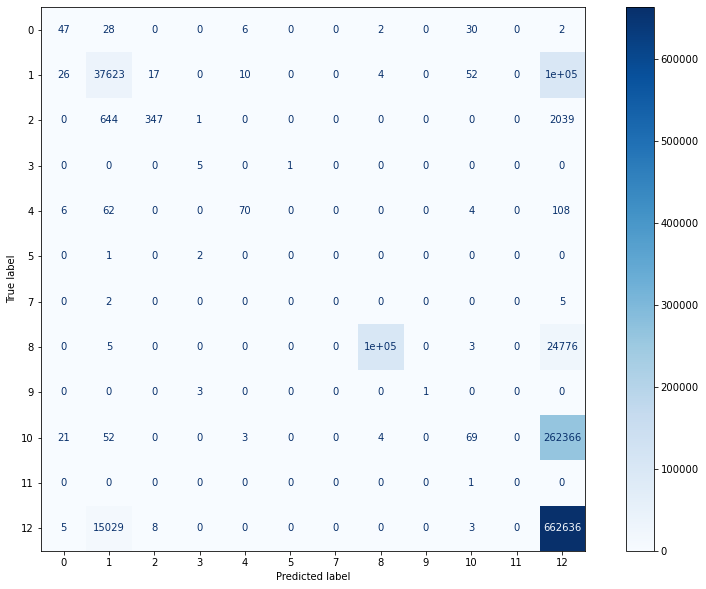

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(Rf_clf, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.show()